In [58]:
import torch
from transformers import AutoTokenizer, AutoModel, AutoConfig
import pytorch_lightning as pl

import wandb 
import pandas as pd
import numpy as np
import seaborn as sns

from utils import util
from datamodule import effectiveness_datamodule as datamodule
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
config = {
    "input_dir": "data/train.csv",
    "output_dir": "saved",
    "num_workers": 2,
    "batch_size": 16,
    "model_name": "bert-base-cased",
    "max_len": 512,
}

In [33]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
train_df = pd.read_csv("data/train.csv")
train_df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate


count    36765.000000
mean        54.636557
std         56.178913
min          3.000000
25%         20.000000
50%         34.000000
75%         69.000000
max        923.000000
Name: discourse_text, dtype: float64


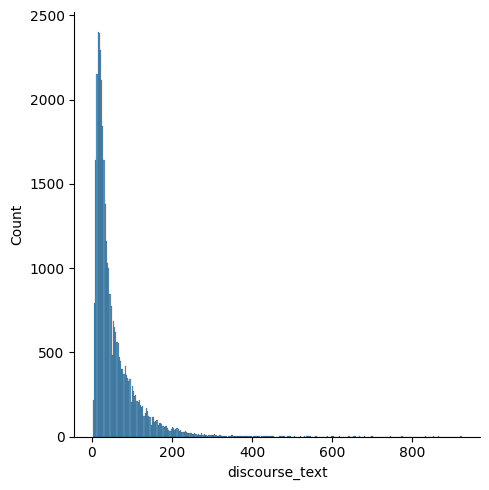

In [48]:
lengths = train_df['discourse_text'].map(lambda text: util.token_len(text, tokenizer))
assert(lengths[0] == len(tokenizer(train_df.loc[0, 'discourse_text']).tokens()))

print(lengths.describe())
sns.displot(lengths);

In [70]:
# effectiveness_datamodule = datamodule.EffectivenessDataModule(config)
effectiveness_datamodule.setup()

In [74]:
train_dataloader = effectiveness_datamodule.train_dataloader()
val_dataloader = effectiveness_datamodule.val_dataloader()
test_dataloader = effectiveness_datamodule.test_dataloader()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


{'batch_encoding': {'input_ids': tensor([[  101, 16573,   102,  ...,     0,     0,     0],
          [  101, 16573,   102,  ...,     0,     0,     0],
          [  101, 18959,  5053,  ...,     0,     0,     0],
          ...,
          [  101, 16573,   102,  ...,     0,     0,     0],
          [  101,   140, 20737,  ...,     0,     0,     0],
          [  101,   140, 20737,  ...,     0,     0,     0]]),
  'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]),
  'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          ...,
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0]])},
 'label': tensor([[2],
         [0],
         [1],
         [0],
         [1],
         [

In [77]:
next(iter(test_dataloader))

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


AttributeError: Caught AttributeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/dminn/Projects/kaggle-competitions/kaggle_venv/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/dminn/Projects/kaggle-competitions/kaggle_venv/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 49, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/dminn/Projects/kaggle-competitions/kaggle_venv/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 49, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/dminn/Projects/kaggle-competitions/predicting_effective_arguments/datamodule/effectiveness_datamodule.py", line 41, in __getitem__
    label = label2id[self.label[index]]
AttributeError: 'EffectivenessDataset' object has no attribute 'label'
